In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# define global variables and vectors
n_steps = 100

S = np.zeros(n_steps)
I = np.zeros(n_steps)
R = np.zeros(n_steps)
P = np.zeros(n_steps)
N = np.zeros(n_steps)

changing_points = [
    25,
    50,
    75,
]

# # first scenario
# betas = np.array([0.3, 0.4, 0.25, 0.2])
# gammas = np.array([0.05, 0.15, 0.2, 0.25])

N[0] = 1_000_000
S[0] = N[0] - 50
I[0] = 50
R[0] = 0
P[0] = I[0] / N[0]

In [3]:
beta = np.concatenate(
    (
        np.ones(
            25,
        )
        * 0.5,
        np.ones(
            25,
        )
        * 0.3,
        np.ones(
            25,
        )
        * 0.4,
        np.ones(
            25,
        )
        * 0.2,
    )
)

In [4]:
gamma = np.concatenate(
    (
        np.ones(
            25,
        )
        * 0.1,
        np.ones(
            25,
        )
        * 0.3,
        np.ones(
            25,
        )
        * 0.2,
        np.ones(
            25,
        )
        * 0.4,
    )
)

In [5]:
for i in range(1, n_steps):
    delta_i = np.random.binomial(S[i - 1], 1 - np.exp(-beta[i] * P[i - 1]))
    delta_r = np.random.binomial(I[i - 1], gamma[i])
    S[i] = S[i - 1] - delta_i
    I[i] = I[i - 1] + delta_i - delta_r
    R[i] = R[i - 1] + delta_r
    N[i] = S[i] + I[i] + R[i]
    P[i] = I[i] / N[i]

In [6]:
np.savez("scenario_3", S=S, I=I, R=R, N=N, P=P, beta=beta, gamma=gamma)

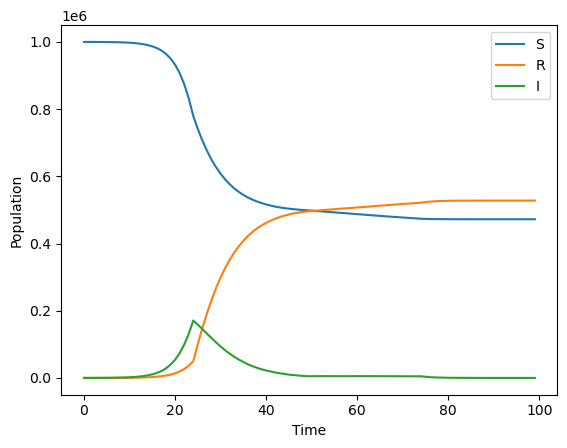

In [7]:
def plot_population_data(S, R, I):
    """
    Plots the population data for susceptible (S), recovered (R), and infected (I) individuals over time.

    Parameters:
    S (array-like): Array of susceptible population counts over time.
    R (array-like): Array of recovered population counts over time.
    I (array-like): Array of infected population counts over time.

    Returns:
    None
    """
    plt.plot(S, label="S")
    plt.plot(R, label="R")
    plt.plot(I, label="I")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()


plot_population_data(S, R, I)